<a href="https://colab.research.google.com/github/ShivamAryaJha/Covid-19-Detection-via-CovNets/blob/master/DetectingCovid'19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
URL = 'https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/metadata.csv'
#covimg = tf.keras.utils.get_file( 'images', URL)
#os.listdir(os.path.dirname(covimg))
df = pd.read_csv(URL, error_bad_lines=False)

In [ ]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0,M,65,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3,M,65,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5,M,65,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6,M,65,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0,F,52,COVID-19,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
!wget  https://cb.lk/covid_19
!unzip covid_19

In [ ]:
train  = 'CovidDataset/Train'
val = 'CovidDataset/Val'
trcovid = os.path.join(train, 'Covid')
trnorm = os.path.join(train, 'Normal')
valcovid = os.path.join(val, 'Covid')
valnorm = os.path.join(val, 'Normal')
print(trcovid)
print(trnorm)
print(valcovid)
print(valnorm)

CovidDataset/Train/Covid
CovidDataset/Train/Normal
CovidDataset/Val/Covid
CovidDataset/Val/Normal


In [ ]:
print(len(os.listdir(trcovid)))
print(len(os.listdir(trnorm)))
print(len(os.listdir(valcovid)))
print(len(os.listdir(valnorm)))

112
112
30
30


In [ ]:
train_gen = ImageDataGenerator( rescale = 1./255, 
                               horizontal_flip= True,
                               shear_range =  0.2,
                               zoom_range = 0.2)
val_gen = ImageDataGenerator( rescale = 1./255)
train_data_gen = train_gen.flow_from_directory( directory = 'CovidDataset/Train',
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary')
val_data_gen = val_gen.flow_from_directory( directory =  'CovidDataset/Val',
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary')
train_data_gen.class_indices
key_list = list(train_data_gen.class_indices.keys()) 
val_list = list(train_data_gen.class_indices.values())

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add( MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add( Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,  activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile( optimizer = 'adam', loss = 'BinaryCrossentropy', metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [ ]:
sol = model.fit_generator(
    train_data_gen,
    steps_per_epoch = 224 // 32,
    epochs = 10,
    validation_data = val_data_gen,
    validation_steps = 60 // 32
)

Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 0.2349 - accuracy: 0.9018 - val_loss: 0.0614 - val_accuracy: 0.9688
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.2194 - accuracy: 0.9152 - val_loss: 0.0850 - val_accuracy: 0.9688
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.2001 - accuracy: 0.9152 - val_loss: 0.0667 - val_accuracy: 0.9688
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.2064 - accuracy: 0.9152 - val_loss: 0.0704 - val_accuracy: 0.9688
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.2156 - accuracy: 0.9330 - val_loss: 0.1208 - val_accuracy: 0.9375
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.2162 - accuracy: 0.8839 - val_loss: 0.0779 - val_accuracy: 0.9688
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.2448 - accuracy: 0.8661 - val_loss: 0.0421 - val_accuracy: 0.9688
Epoch 8/10
7/7 [=========================

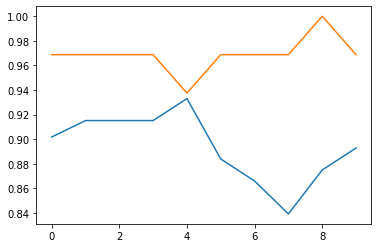

In [ ]:
epoch_range = np.arange(10)
plt.plot(epoch_range, sol.history['accuracy'] )
plt.plot(epoch_range, sol.history['val_accuracy'])

In [ ]:
pred  = model.predict(val_data_gen)

In [ ]:
pred = np.round(pred)
lis = [val_data_gen[0][0][i]  for i in np.arange(25)]


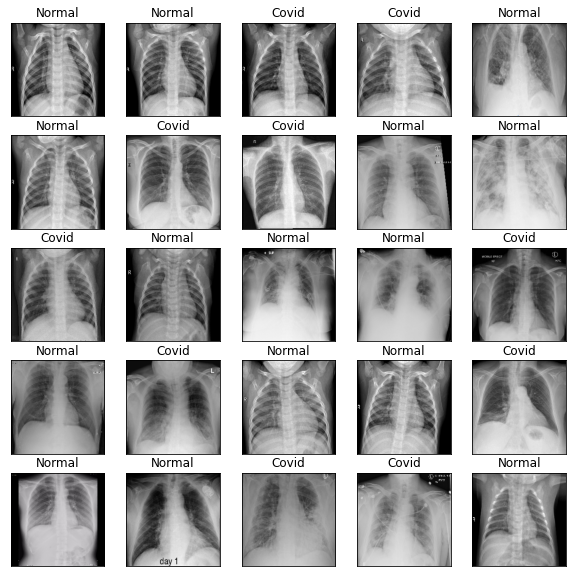

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(lis[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(str(key_list[val_list.index(pred[i])]))